<a href="https://colab.research.google.com/github/katamaranindustries/fedra/blob/main/Temsirolimus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('Temsirolimus.csv')

In [3]:
categorical_cols = ['Cell line', 'TCGA classification', 'Tissue', 'Tissue sub-type']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [4]:
df['Response'] = df['IC50'] >= 10

In [5]:
X = df.drop(['IC50', 'Response'], axis=1)
y = df['Response']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

In [8]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

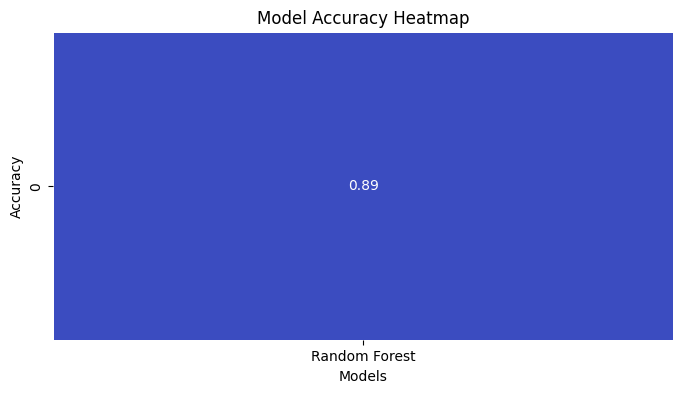

In [9]:
accuracy_matrix = [[rf_acc]]
model_names = ['Random Forest']
accuracy_df = pd.DataFrame(accuracy_matrix, columns=model_names)

plt.figure(figsize=(8, 4))
sns.heatmap(accuracy_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=False)
plt.title('Model Accuracy Heatmap')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

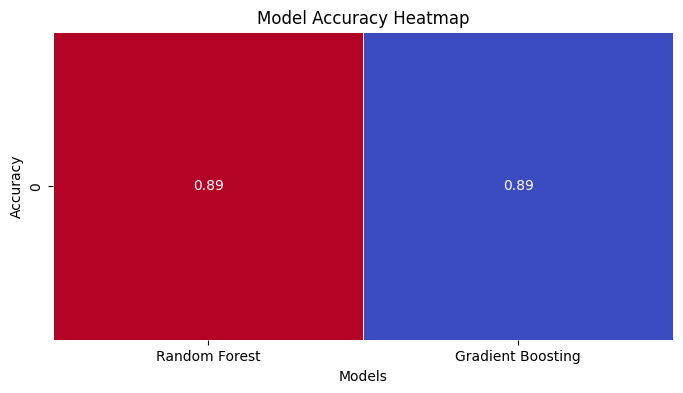

In [10]:
accuracy_matrix = [[rf_acc, gb_acc]]
model_names = ['Random Forest', 'Gradient Boosting']
accuracy_df = pd.DataFrame(accuracy_matrix, columns=model_names)

plt.figure(figsize=(8, 4))
sns.heatmap(accuracy_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=False)
plt.title('Model Accuracy Heatmap')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [11]:
# Create a heatmap with data points
accuracy_matrix = [[rf_acc, gb_acc]]
model_names = ['Random Forest', 'Gradient Boosting']
accuracy_df = pd.DataFrame(accuracy_matrix, columns=model_names)

In [12]:
# Display data points (Response or Not) in a table
data_points = df['Response'].map({True: 'Response', False: 'Not'})
data_points_df = pd.DataFrame({'Data Points': data_points})

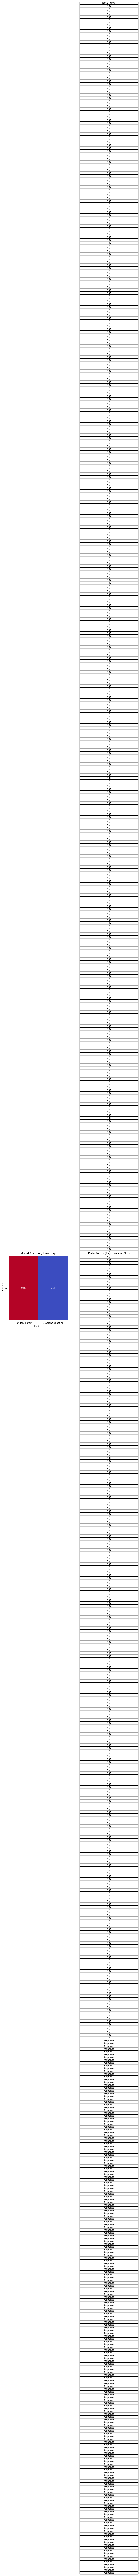

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.heatmap(accuracy_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=False)
plt.title('Model Accuracy Heatmap')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the table
plt.subplot(122)
plt.axis('off')
plt.table(cellText=data_points_df.values, colLabels=data_points_df.columns, cellLoc='center', loc='center')
plt.title('Data Points (Response or Not)')

plt.show()

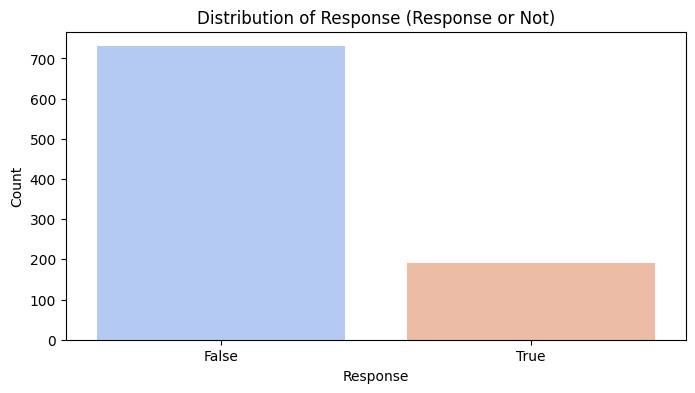

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Response', data=df, palette='coolwarm')
plt.title('Distribution of Response (Response or Not)')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()
